In [1]:
from mne import Epochs, find_events
from time import time, strftime, gmtime
import os
import numpy as np
from utils import utils
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import sys
sys.executable

'/Users/Ralf/anaconda3/envs/muse/bin/python'

### Load data into MNE objects


In [3]:
#%matplotlib qt
#plt.ion()


In [95]:
raw.filter?

Current Subject #1
Creating RawArray with float64 data, n_channels=5, n_times=30564
    Range : 0 ... 30563 =      0.000 ...   119.387 secs
Ready.
Creating RawArray with float64 data, n_channels=5, n_times=30564
    Range : 0 ... 30563 =      0.000 ...   119.387 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of 1691 samples (6.605 sec) selected


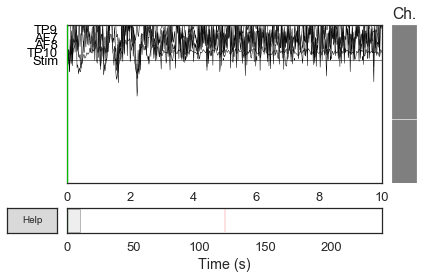

In [105]:
curr_subject = 0
print("Current Subject #" + str(curr_subject+1))

raw = utils.load_data('../data/subjects/', 
                          subject_nb = curr_subject+1, 
                          sfreq = 256., 
                          session_nb = [1,2]);

raw.notch_filter(60)

raw.filter(1,20, method='iir', verbose= False);

raw.plot();

In [106]:
#raw.info['bads'] = ['AF7', 'AF8']  


213 events found
Event IDs: [1 2]


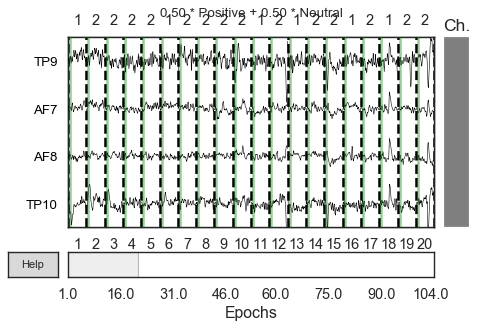

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


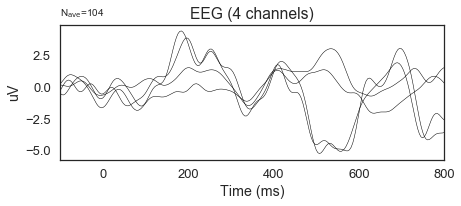

In [110]:
events = find_events(raw);
event_id = {'Positive': 1, 'Neutral': 2};


#epochs.average().plot();


epochs = Epochs(raw, events=events, 
                    event_id=event_id, 
                    tmin=-0.1, 
                    tmax=0.8, 
                    baseline=(-0.1,0),
                    reject= {'eeg': 200e-6}, 
                    preload=True, 
                    verbose=False, picks=[0,1,2,3]);
epochs.plot(block=True);

epochs.average().plot();



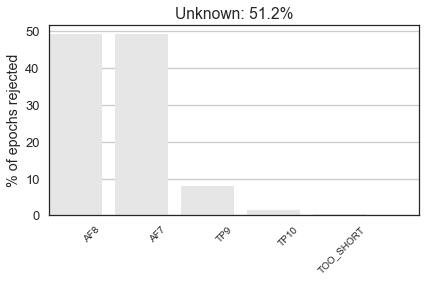

In [111]:
epochs.plot_drop_log();


In [112]:
epochs

<Epochs  |   104 events (all good), -0.101562 - 0.800781 sec, baseline [-0.1, 0], ~771 kB, data loaded,
 'Neutral': 52
 'Positive': 52>

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


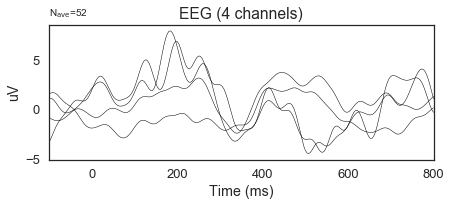

In [113]:
#picks = mne.pick_types(epochs.info, eeg=True)
evoked_pos = epochs['Positive'].average()
evoked_pos.plot();

In [77]:
evoked_pos.data.shape

(4, 232)

In [88]:
a = [0,3]

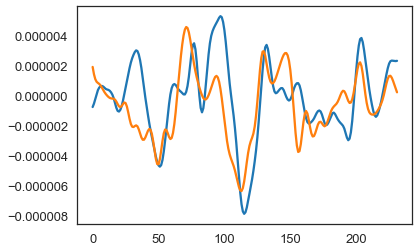

In [89]:
plt.plot(evoked_pos.data[[0,3],:].T);

In [91]:
evoked_pos.data[[1,2],:] = np.nan

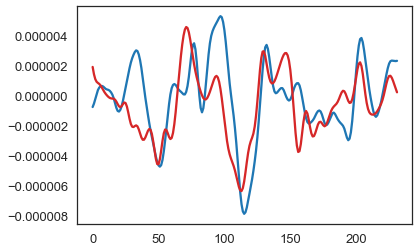

In [92]:
plt.plot(evoked_pos.data[:,:].T);

In [93]:
evoked_pos.data[:,:]

array([[-7.78572158e-07, -5.52152533e-07, -2.47490149e-07,
         8.15748138e-08,  3.47777908e-07,  5.12942560e-07,
         5.98976959e-07,  6.24683828e-07,  5.84978314e-07,
         4.98856860e-07,  4.22139810e-07,  3.85916549e-07,
         3.60041755e-07,  3.00404876e-07,  1.94834398e-07,
         3.70338950e-08, -2.00158695e-07, -5.16718385e-07,
        -8.33809980e-07, -1.03943734e-06, -1.07925381e-06,
        -9.67328604e-07, -7.25206108e-07, -3.63605177e-07,
         7.80350653e-08,  5.32440386e-07,  9.64522803e-07,
         1.38838020e-06,  1.80673219e-06,  2.17744743e-06,
         2.46696201e-06,  2.69445928e-06,  2.88212834e-06,
         2.99041202e-06,  2.94670402e-06,  2.72129633e-06,
         2.33585092e-06,  1.81589074e-06,  1.18545660e-06,
         5.02459795e-07, -1.55998887e-07, -7.57607109e-07,
        -1.32449720e-06, -1.86893048e-06, -2.36420761e-06,
        -2.79935515e-06, -3.21602938e-06, -3.65243621e-06,
        -4.07957562e-06, -4.42931442e-06, -4.65895307e-0

In [17]:
#evoked.interpolate_bads(reset_bads=False, verbose=False)

#evoked.plot(exclude=[], time_unit='s')


NameError: name 'evoked' is not defined

In [ ]:
from autoreject import compute_thresholds  # noqa
import mne

picks = mne.pick_types(epochs.info, meg=False, eeg=True, stim=False,
                       eog=False, exclude='bads')

threshes = compute_thresholds(epochs, picks=picks, method='random_search',
                              random_state=42, augment=False,
                              verbose='progressbar')

In [ ]:
threshes

In [ ]:
epochs.drop_bad?



Current Subject #1
Creating RawArray with float64 data, n_channels=5, n_times=30564
    Range : 0 ... 30563 =      0.000 ...   119.387 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of 1691 samples (6.605 sec) selected
105 events found
Event IDs: [1 2]
sample drop %:  100.0
Current Subject #2
Creating RawArray with float64 data, n_channels=5, n_times=30420
    Range : 0 ... 30419 =      0.000 ...   118.824 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of 1691 samples (6.605 sec) selected
105 events found
Event IDs: [1 2]
sample drop %:  33.333333333333336


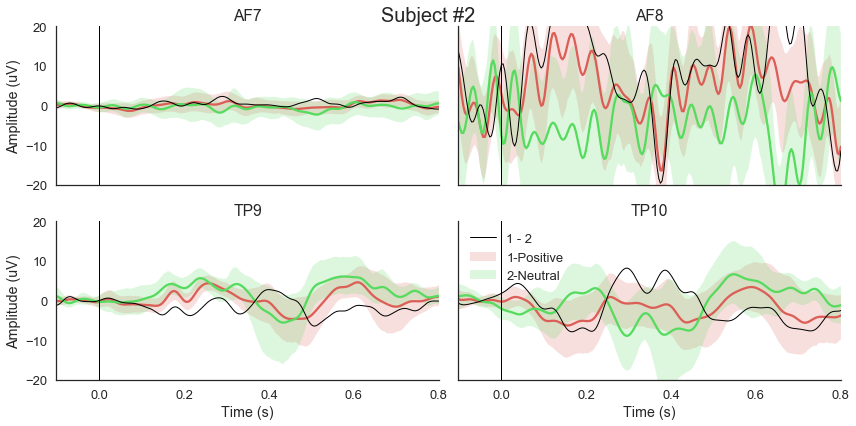

Current Subject #3
Creating RawArray with float64 data, n_channels=5, n_times=30564
    Range : 0 ... 30563 =      0.000 ...   119.387 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of 1691 samples (6.605 sec) selected
107 events found
Event IDs: [1 2]
sample drop %:  0.9345794392523366


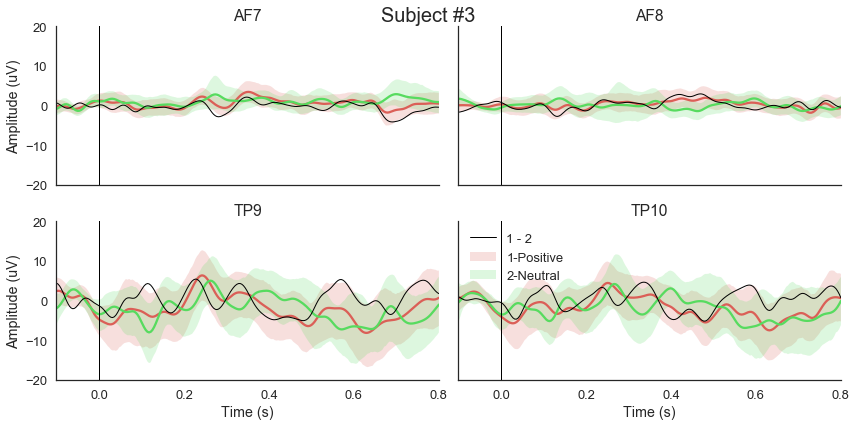

Current Subject #4
Creating RawArray with float64 data, n_channels=5, n_times=18888
    Range : 0 ... 18887 =      0.000 ...    73.777 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of 1691 samples (6.605 sec) selected
67 events found
Event IDs: [1 2]
sample drop %:  13.432835820895528


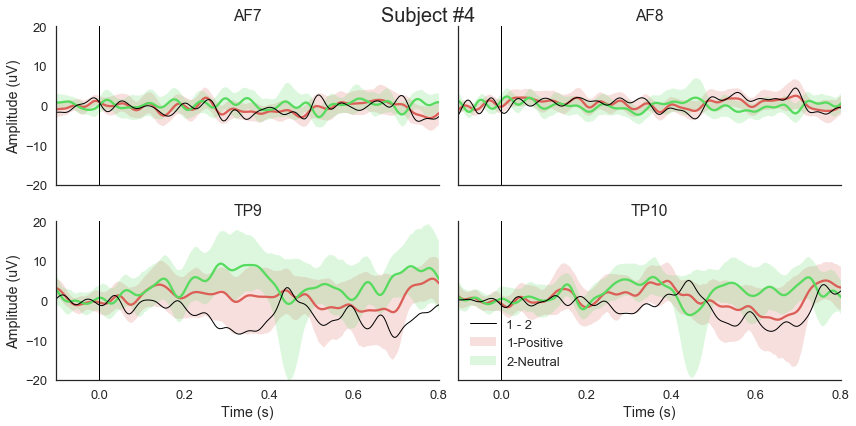

Current Subject #5
Creating RawArray with float64 data, n_channels=5, n_times=30564
    Range : 0 ... 30563 =      0.000 ...   119.387 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of 1691 samples (6.605 sec) selected
105 events found
Event IDs: [1 2]
sample drop %:  67.61904761904762
Current Subject #6
Creating RawArray with float64 data, n_channels=5, n_times=30564
    Range : 0 ... 30563 =      0.000 ...   119.387 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of 1691 samples (6.605 sec) selected
107 events found
Event IDs: [1 2]
sample drop %:  31.775700934579444


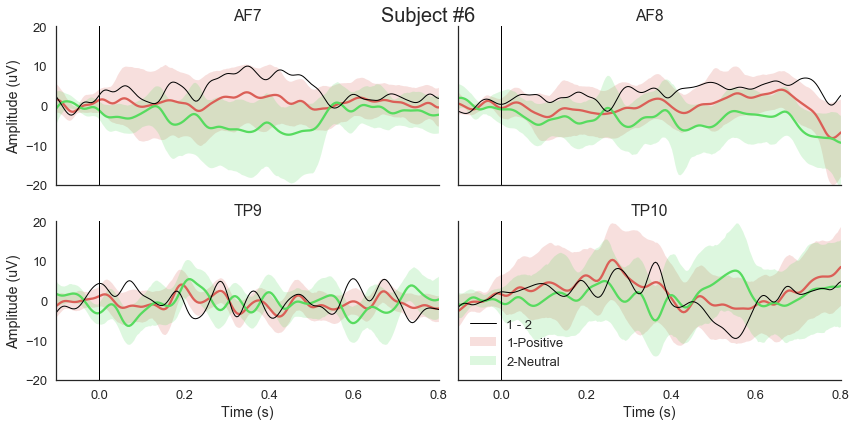

Current Subject #7
Creating RawArray with float64 data, n_channels=5, n_times=30552
    Range : 0 ... 30551 =      0.000 ...   119.340 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of 1691 samples (6.605 sec) selected
106 events found
Event IDs: [1 2]
sample drop %:  36.79245283018868


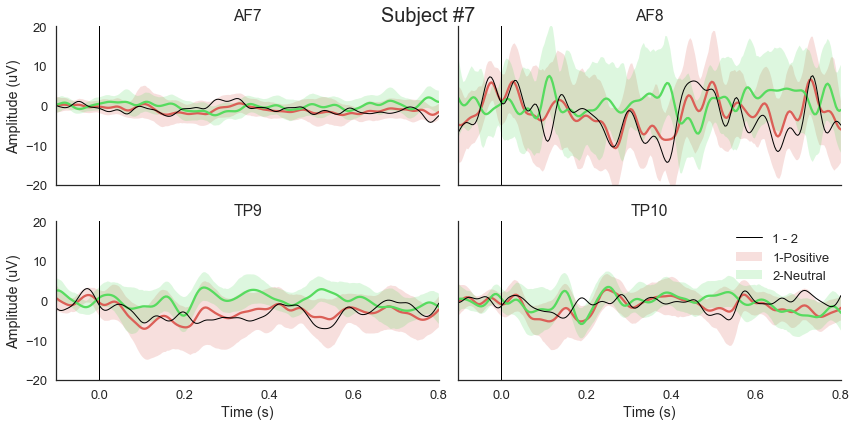

Current Subject #8
Creating RawArray with float64 data, n_channels=5, n_times=30564
    Range : 0 ... 30563 =      0.000 ...   119.387 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of 1691 samples (6.605 sec) selected
105 events found
Event IDs: [1 2]
sample drop %:  37.142857142857146


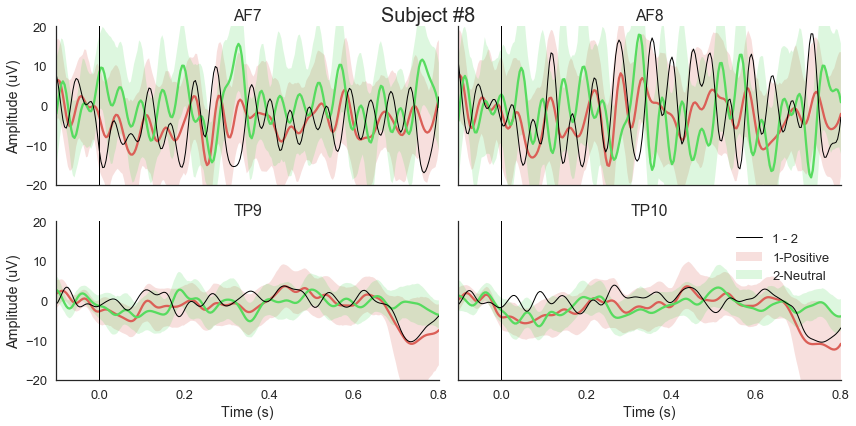

Current Subject #9
Creating RawArray with float64 data, n_channels=5, n_times=30564
    Range : 0 ... 30563 =      0.000 ...   119.387 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of 1691 samples (6.605 sec) selected
106 events found
Event IDs: [1 2]
sample drop %:  3.7735849056603765


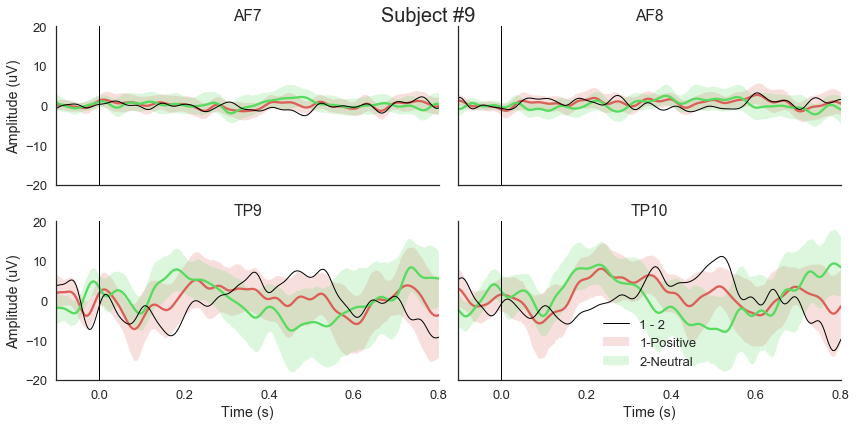

Current Subject #10
Creating RawArray with float64 data, n_channels=5, n_times=30564
    Range : 0 ... 30563 =      0.000 ...   119.387 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of 1691 samples (6.605 sec) selected
107 events found
Event IDs: [1 2]
sample drop %:  95.32710280373831
Current Subject #11
Creating RawArray with float64 data, n_channels=5, n_times=30564
    Range : 0 ... 30563 =      0.000 ...   119.387 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of 1691 samples (6.605 sec) selected
108 events found
Event IDs: [1 2]
sample drop %:  90.74074074074075
Current Subject #12
Creating RawArray with float64 data, n_channels=5, n_times=30564
    Range : 0 ... 30563 =      0.000 ...   119.387 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of 1691 samples (6.605 sec) selected
106 events found
Event IDs: [1 2]
sample drop %:  46.22641509433962


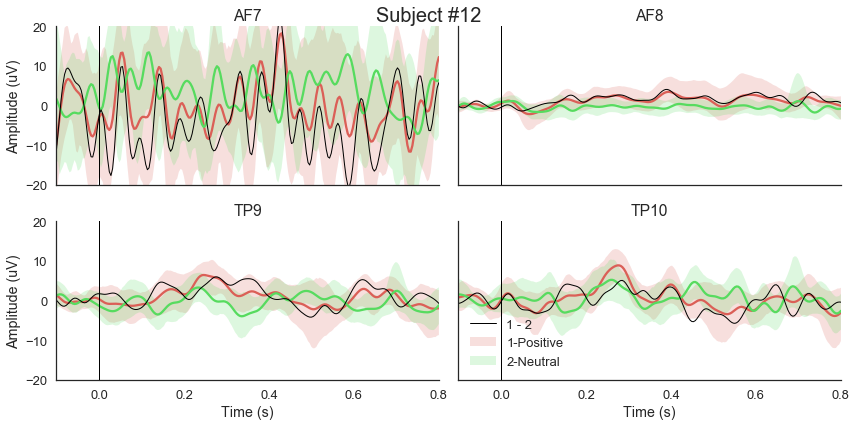

Current Subject #13
Creating RawArray with float64 data, n_channels=5, n_times=30576
    Range : 0 ... 30575 =      0.000 ...   119.434 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of 1691 samples (6.605 sec) selected
105 events found
Event IDs: [1 2]
sample drop %:  28.57142857142857


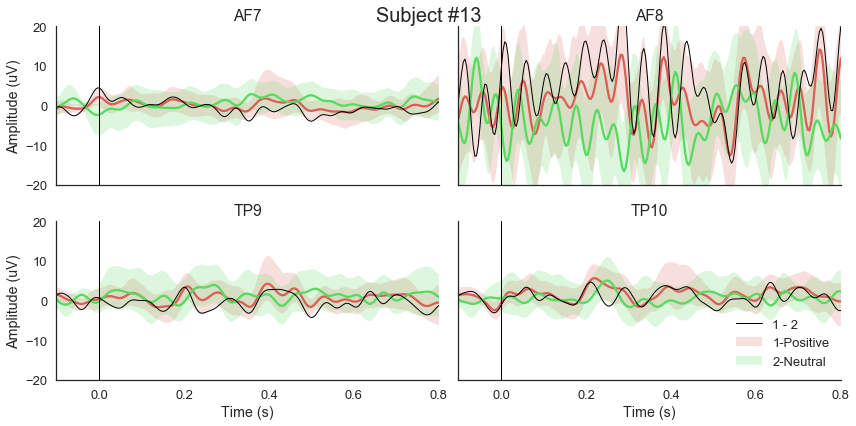

Current Subject #14
Creating RawArray with float64 data, n_channels=5, n_times=30564
    Range : 0 ... 30563 =      0.000 ...   119.387 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of 1691 samples (6.605 sec) selected
107 events found
Event IDs: [1 2]
sample drop %:  16.82242990654206


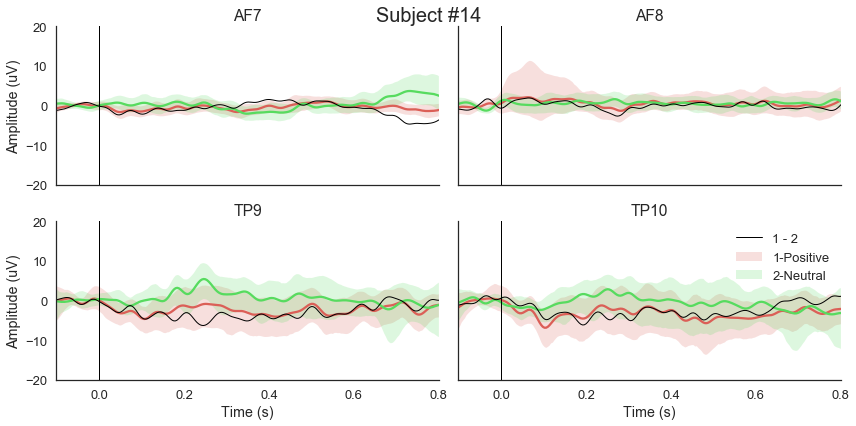

Current Subject #15
Creating RawArray with float64 data, n_channels=5, n_times=30576
    Range : 0 ... 30575 =      0.000 ...   119.434 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of 1691 samples (6.605 sec) selected
108 events found
Event IDs: [1 2]
sample drop %:  38.888888888888886


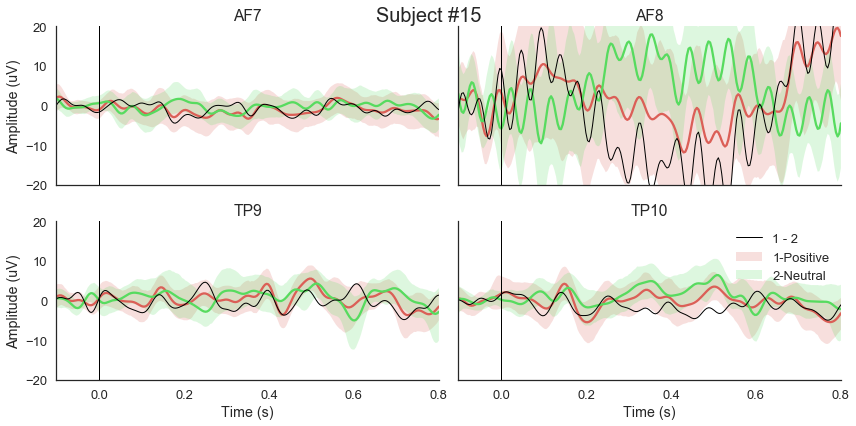

Current Subject #16
Creating RawArray with float64 data, n_channels=5, n_times=30564
    Range : 0 ... 30563 =      0.000 ...   119.387 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of 1691 samples (6.605 sec) selected
107 events found
Event IDs: [1 2]
sample drop %:  87.85046728971963
Current Subject #17
Creating RawArray with float64 data, n_channels=5, n_times=30564
    Range : 0 ... 30563 =      0.000 ...   119.387 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of 1691 samples (6.605 sec) selected
106 events found
Event IDs: [1 2]
sample drop %:  13.207547169811317


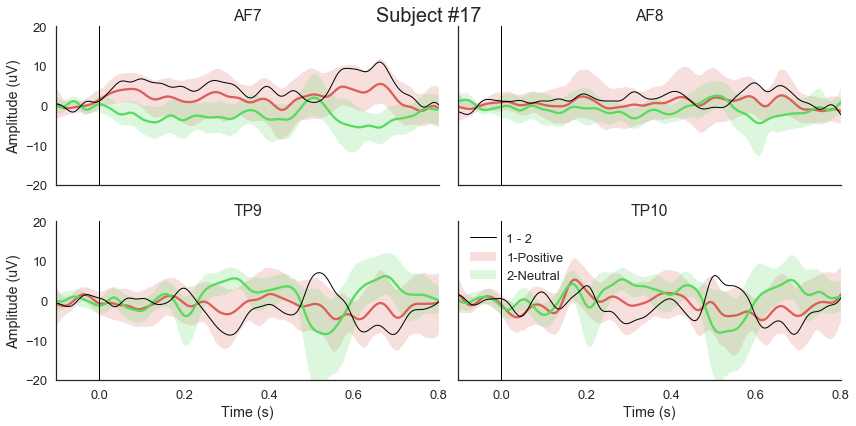

Current Subject #18
Creating RawArray with float64 data, n_channels=5, n_times=30564
    Range : 0 ... 30563 =      0.000 ...   119.387 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of 1691 samples (6.605 sec) selected
107 events found
Event IDs: [1 2]
sample drop %:  81.30841121495327
Current Subject #19
Creating RawArray with float64 data, n_channels=5, n_times=30576
    Range : 0 ... 30575 =      0.000 ...   119.434 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of 1691 samples (6.605 sec) selected
106 events found
Event IDs: [1 2]
sample drop %:  19.811320754716977


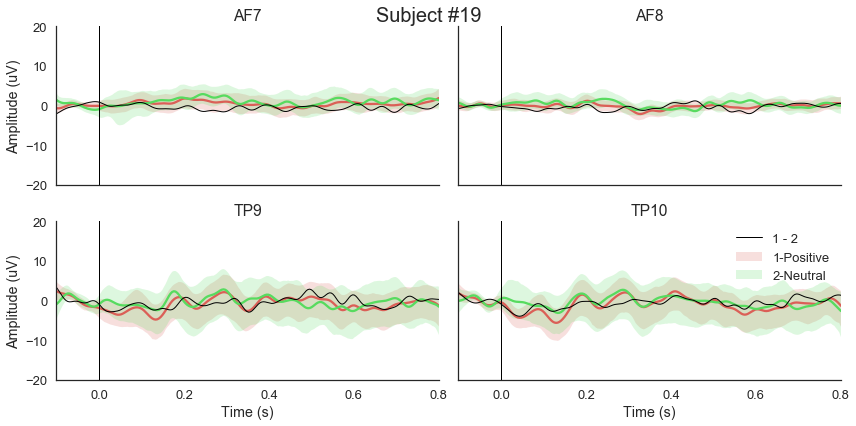

Current Subject #20
Creating RawArray with float64 data, n_channels=5, n_times=30564
    Range : 0 ... 30563 =      0.000 ...   119.387 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of 1691 samples (6.605 sec) selected
106 events found
Event IDs: [1 2]
sample drop %:  2.8301886792452824


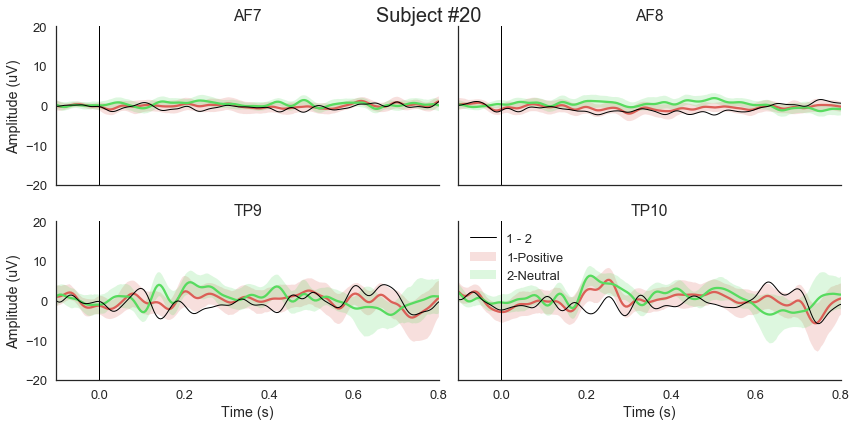

In [124]:
all_evokeds = []
all_data = [] 

%matplotlib inline

good_subjects = 0

for curr_subject in range(20):
    print("Current Subject #" + str(curr_subject+1))

    raw = utils.load_data('../data/subjects/', 
                          subject_nb = curr_subject+1, 
                          sfreq = 256., 
                          session_nb = [1]);

    raw.notch_filter(60);
    raw.filter(1,20, method='iir', verbose= False);

    events = find_events(raw);
    event_id = {'Positive': 1, 'Neutral': 2};

    epochs = Epochs(raw, events=events, 
                    event_id=event_id, 
                    tmin=-0.1, 
                    tmax=0.8, 
                    baseline=(-0.1,0),
                    reject= {'eeg': 200e-6}, 
                    preload=True, 
                    verbose=False, picks=[0,1,2,3]);

    
    #from autoreject import get_rejection_threshold  # noqa
    #reject = get_rejection_threshold(epochs, decim=1)
    
    sample_drop = (1 - len(epochs.events)/len(events)) * 100
    print('sample drop %: ', sample_drop)

    conditions = OrderedDict()
    conditions['1-Positive'] = [1]
    conditions['2-Neutral'] = [2]
    
    curr_title = "Subject #" +str(curr_subject+1)

    if sample_drop < 50:
        good_subjects += 1
        fig, ax = utils.plot_conditions(epochs, conditions=conditions, 
                                        ci=97.5, n_boot=1000, 
                                        title = curr_title,
                                        diff_waveform=(2,1),
                                        ylim=(-20, 20));
        plt.show()
        
        evokeds = [epochs[name].average() for name in ('Positive', 'Neutral')]

        %matplotlib inline
        from mne.viz import plot_evoked_topo
        colors = 'red', 'blue'

        #plot_evoked_topo(evokeds, 
        #                 color=colors, 
        #                 title=curr_title, 
        #                 background_color='w');
        
        all_evokeds.append(evokeds)
        
        evokeds[0].data.shape  #pos
        
        evokeds[1].data.shape  #neu
        all_data.append(np.stack((   evokeds[0].data, evokeds[1].data))) 

        plt.show() #'''

#print(good_subjects)



In [132]:
all_data1.shape


(14, 2, 4, 232)

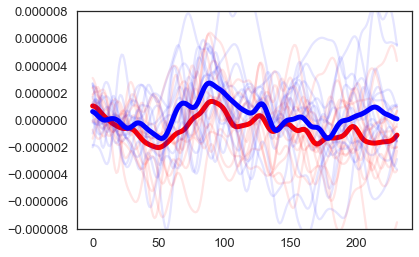

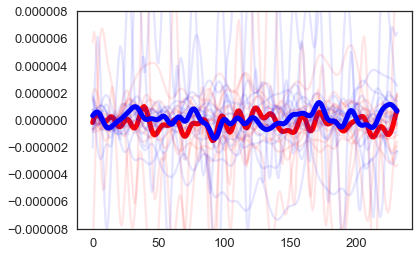

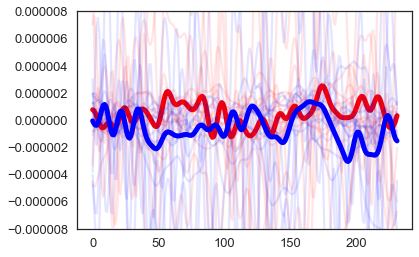

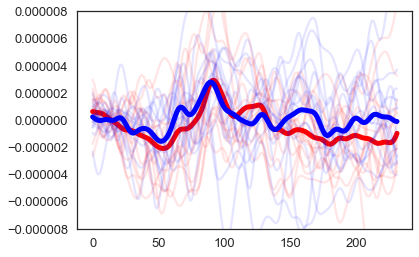

In [137]:
all_data1 = np.asarray(all_data)
all_data1.shape

for sensor in range(4):
    plt.plot(all_data1[:,0,sensor,:].T, color = 'red', alpha = 0.1);
    plt.plot(np.mean(all_data1[:,0,sensor,:], axis =0), color = 'red', linewidth = 5);

    plt.plot(all_data1[:,1,sensor,:].T, color = 'blue', alpha = 0.1);
    plt.plot(np.mean(all_data1[:,1,sensor,:], axis =0), color = 'blue', linewidth = 5 );
    plt.ylim(-0.000008, 0.000008)
    plt.show()

In [ ]:
all_evokeds = []
all_data = [] 

good_subjects = 0

for curr_subject in range(20):
    print("Current Subject #" + str(curr_subject+1))

    raw = utils.load_data('../data/subjects/', 
                          subject_nb = curr_subject+1, 
                          sfreq = 256., 
                          session_nb = [1]);

    raw.filter(1,30, method='iir', verbose= False);

    events = find_events(raw);
    event_id = {'Positive': 1, 'Neutral': 2};

    epochs = Epochs(raw, events=events, 
                    event_id=event_id, 
                    tmin=-0.1, 
                    tmax=0.8, 
                    baseline=(-0.1,0),
                    reject={'eeg': 450e-6}, 
                    preload=True, 
                    verbose=False, picks=[0,1,2,3]);

    sample_drop = (1 - len(epochs.events)/len(events)) * 100
    print('sample drop %: ', sample_drop)

    conditions = OrderedDict()
    conditions['1-Positive'] = [1]
    conditions['2-Neutral'] = [2]
    
    curr_title = "Subject #" +str(curr_subject+1)

    if sample_drop < 50:
        good_subjects += 1
        #fig, ax = utils.plot_conditions(epochs, conditions=conditions, 
        #                                ci=97.5, n_boot=1000, 
        #                                title = curr_title,
        #                                diff_waveform=(2,1),
        #                                ylim=(-8, 8));
        
        evokeds = [epochs[name].average() for name in ('Positive', 'Neutral')]

        %matplotlib inline
        from mne.viz import plot_evoked_topo
        colors = 'red', 'blue'

        #plot_evoked_topo(evokeds, 
        #                 color=colors, 
        #                 title=curr_title, 
        #                 background_color='w');
        
        all_evokeds.append(evokeds)
        
        evokeds[0].data.shape  #pos
        
        evokeds[1].data.shape  #neu
        all_data.append(np.stack((   evokeds[0].data, evokeds[1].data))) 

        plt.show()
print(good_subjects)

all_data1 = np.asarray(all_data)
all_data1.shape

plt.plot(all_data1[:,0,0,:].T, color = 'red', alpha = 0.1);
plt.plot(np.mean(all_data1[:,0,0,:], axis =0), color = 'red', linewidth = 5);

plt.plot(all_data1[:,1,0,:].T, color = 'blue', alpha = 0.1);
plt.plot(np.mean(all_data1[:,1,0,:], axis =0), color = 'blue', linewidth = 5 );
plt.ylim(-0.000008, 0.000008)

In [ ]:
all_evokeds = []
all_data = [] 

good_subjects = 0

for curr_subject in range(20):
    print("Current Subject #" + str(curr_subject+1))

    raw = utils.load_data('../data/subjects/', 
                          subject_nb = curr_subject+1, 
                          sfreq = 256., 
                          session_nb = [2]);

    raw.filter(1,30, method='iir', verbose= False);

    events = find_events(raw);
    event_id = {'Positive': 1, 'Neutral': 2};

    epochs = Epochs(raw, events=events, 
                    event_id=event_id, 
                    tmin=-0.1, 
                    tmax=0.8, 
                    baseline=(-0.1,0),
                    reject={'eeg': 450e-6}, 
                    preload=True, 
                    verbose=False, picks=[0,1,2,3]);

    sample_drop = (1 - len(epochs.events)/len(events)) * 100
    print('sample drop %: ', sample_drop)

    conditions = OrderedDict()
    conditions['1-Positive'] = [1]
    conditions['2-Neutral'] = [2]
    
    curr_title = "Subject #" +str(curr_subject+1)

    if sample_drop < 50:
        good_subjects += 1
        #fig, ax = utils.plot_conditions(epochs, conditions=conditions, 
        #                                ci=97.5, n_boot=1000, 
        #                                title = curr_title,
        #                                diff_waveform=(2,1),
        #                                ylim=(-8, 8));
        
        evokeds = [epochs[name].average() for name in ('Positive', 'Neutral')]

        %matplotlib inline
        from mne.viz import plot_evoked_topo
        colors = 'red', 'blue'

        #plot_evoked_topo(evokeds, 
        #                 color=colors, 
        #                 title=curr_title, 
        #                 background_color='w');
        
        all_evokeds.append(evokeds)
        
        evokeds[0].data.shape  #pos
        
        evokeds[1].data.shape  #neu
        all_data.append(np.stack((   evokeds[0].data, evokeds[1].data))) 

        plt.show()
print(good_subjects)

all_data2 = np.asarray(all_data)
all_data2.shape

plt.plot(all_data2[:,0,0,:].T, color = 'red', alpha = 0.1);
plt.plot(np.mean(all_data2[:,0,0,:], axis =0), color = 'red', linewidth = 5);

plt.plot(all_data2[:,1,0,:].T, color = 'blue', alpha = 0.1);
plt.plot(np.mean(all_data2[:,1,0,:], axis =0), color = 'blue', linewidth = 5 );
plt.ylim(-0.000008, 0.000008)

In [127]:
plt.plot(np.mean(all_data1[:,0,0,:], axis =0), color = 'red', linewidth = 1, linestyle ='--');
plt.plot(np.mean(all_data2[:,0,0,:], axis =0), color = 'red', linewidth = 1);

plt.plot(np.mean(all_data1[:,1,0,:], axis =0), color = 'blue', linewidth = 1, linestyle ='--');
plt.plot(np.mean(all_data2[:,1,0,:], axis =0), color = 'blue', linewidth = 1 );
plt.ylim(-0.000006, 0.000006)

NameError: name 'all_data1' is not defined

In [ ]:
plt.plot(np.mean(all_data1[:9,0,0,:], axis =0), color = 'red', linewidth = 1, linestyle ='--');
plt.plot(np.mean(all_data1[10:,0,0,:], axis =0), color = 'red', linewidth = 1);

plt.plot(np.mean(all_data1[:9,1,0,:], axis =0), color = 'blue', linewidth = 1, linestyle ='--');
plt.plot(np.mean(all_data1[10:,1,0,:], axis =0), color = 'blue', linewidth = 1 );
plt.ylim(-0.000006, 0.000006)

In [ ]:
all_data1[:,1,0,:].shape

In [ ]:
#first = np.mean(all_data1[:,0,0,:], axis =0) - np.mean(all_data2[:,0,0,:], axis =0)
#second = np.mean(all_data1[:,1,0,:], axis =0) - np.mean(all_data2[:,1,0,:], axis =0)

#plt.plot(first)
#plt.plot(second)

In [ ]:
epochs.events[:, 2]

In [ ]:
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import mne
from mne.datasets import sample
from mne.decoding import GeneralizingEstimator

clf = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs'))
time_gen = GeneralizingEstimator(clf, scoring='roc_auc', n_jobs=1,
                                 verbose=True)

# Fit classifiers on the epochs where the stimulus was presented to the left.
# Note that the experimental condition y indicates auditory or visual
time_gen.fit(X=epochs.get_data(),
             y=epochs.events[:, 2])

In [ ]:
scores = time_gen.score(X=epochs.get_data(),
                        y=epochs.events[:, 2] )

In [ ]:
fig, ax = plt.subplots(1)
im = ax.matshow(scores, vmin=0, vmax=1., cmap='RdBu_r', origin='lower',
                extent=epochs.times[[0, -1, 0, -1]])
ax.axhline(0., color='k')
ax.axvline(0., color='k')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('Testing Time (s)')
ax.set_ylabel('Training Time (s)')
ax.set_title('Generalization across time and condition')
plt.colorbar(im, ax=ax)
plt.show()


In [ ]:
time_gen.

In [ ]:
plt.plot(all_data[:,0,0,:].T, color = 'red', alpha = 0.1);
plt.plot(np.mean(all_data[:,0,0,:], axis =0), color = 'red', linewidth = 5);

plt.plot(all_data[:,1,0,:].T, color = 'blue', alpha = 0.1);
plt.plot(np.mean(all_data[:,1,0,:], axis =0), color = 'blue', linewidth = 5 );
plt.ylim(-0.000008, 0.000008)

In [139]:
pos = []
for i in range(len(all_evokeds)):
    pos.append(all_evokeds[i][0])

print(pos)

neu = []
for i in range(len(all_evokeds)):
    neu.append(all_evokeds[i][1])

print('\n' + str(neu))

[<Evoked  |  'Positive' (mean, N=43), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>, <Evoked  |  'Positive' (mean, N=53), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>, <Evoked  |  'Positive' (mean, N=34), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>, <Evoked  |  'Positive' (mean, N=38), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>, <Evoked  |  'Positive' (mean, N=34), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>, <Evoked  |  'Positive' (mean, N=38), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>, <Evoked  |  'Positive' (mean, N=51), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>, <Evoked  |  'Positive' (mean, N=27), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>, <Evoked  |  'Positive' (mean, N=36), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>, <Evoked  |  'Positive' (mean, N=48), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>, <Evoked  |  'Positive' (mean, N=31), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>, <Evoked  |  'Positive' (mean, N=53), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>, <Evoked  |  'Positive' (mean, N=50), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>

In [140]:
import mne
grand_average_pos = mne.grand_average(pos)
grand_average_pos

grand_average_neu = mne.grand_average(neu)
grand_average_neu

Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.


<Evoked  |  'Grand average (n = 14)' (mean, N=14), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>

In [141]:
ppos = []
for i in range(len(pos)):
    ppos.append( pos[i].data)

import numpy as np
ppos = np.asarray(ppos)
ppos.shape

nneu = []
for i in range(len(neu)):
    nneu.append( neu[i].data)

nneu = np.asarray(nneu)
nneu.shape

(14, 4, 232)

In [142]:
tmin = -0.1
info = mne.create_info(
    ch_names = ['TP9', 'AF7', 'AF8', 'TP10'],
    ch_types = ['eeg', 'eeg', 'eeg', 'eeg'],
    sfreq = 256,
    
)

# The number of epochs that were averaged
nave = 19

# A comment to describe to evoked (usually the condition name)
comment = "test"


In [143]:
evoked_array = mne.EvokedArray(grand_average_pos.data, 
                               info, 
                               tmin,
                               comment=comment, 
                               nave=nave)
#dig = epochs.info['dig'],


In [144]:
epochs

<Epochs  |   103 events (all good), -0.101562 - 0.800781 sec, baseline [-0.1, 0], ~764 kB, data loaded,
 'Neutral': 50
 'Positive': 53>

In [145]:
evoked_array.set_montage?

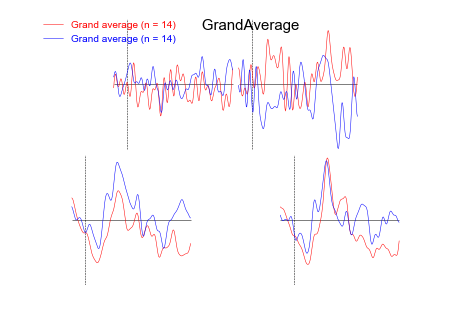

In [146]:
plot_evoked_topo([grand_average_pos, grand_average_neu], 
                         color=colors, 
                         title="                                       GrandAverage", 
                         background_color='w');

In [ ]:
plt.plot(grand_average_pos.data[0,:], 'r');
plt.plot(grand_average_neu.data[0,:], 'b');
plt.plot(grand_average_pos.data[0,:] - grand_average_neu.data[0,:], 'black', alpha = 0.5);

In [ ]:
fig, ax = utils.plot_conditions?

In [ ]:
fig, ax = utils.plot_conditions

In [ ]:
pos[0].plot_image(exclude = ['AF8', 'AF7']);
neu[0].plot_image(exclude = ['AF8', 'AF7']);

pos[1].plot_image(exclude = ['AF8', 'AF7']);
pos[2].plot_image(exclude = ['AF8', 'AF7']);
pos[3].plot_image(exclude = ['AF8', 'AF7']);
pos[4].plot_image(exclude = ['AF8', 'AF7']);

In [ ]:
evokeds[0].plot_image(exclude = ['AF8', 'AF7']);

In [ ]:
evokeds

In [ ]:
evokeds

In [ ]:
plt.ion()
%matplotlib qt
raw.plot()

In [ ]:
#epochs.get_data().shape

In [ ]:
evoked = epochs.average()

title = 'EEG Original reference'
evoked.plot(titles = dict(eeg=title), time_unit='s');

#

In [ ]:
#evoked.plot_topomap(times=[0.1], size=3., title=title, time_unit='s');


In [ ]:
#utils.plot_conditions?

Here we have a very nice deflection in the temporal channels around 200ms for face stimuli. This is likely the N170, although appearing slightly later due to delay in receiving the data over bluetooth. 

There's not much to see in the frontal channels (AF7 and AF8), but that's to be expected based on the fact that the N170 is mostly a lateral posterior brain phenomenon

In [ ]:
all_data = epochs.get_data();
all_data.shape

In [ ]:
epochs.events[:,2]==2

In [ ]:
cond2_trials = all_data[epochs.events[:,2]==2, :, :]
cond2_trials.shape

In [ ]:
cond1_trials = all_data[epochs.events[:,2]==1, :, :]
cond1_trials.shape

In [ ]:
import numpy as np
cond2_erp = np.mean(cond2_trials, axis = 0)
cond1_erp = np.mean(cond1_trials, axis = 0)

cond2_erp.shape

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,2))
plt.plot(cond2_erp[3,:], 'red')
plt.plot(cond1_erp[3,:], 'green')

In [ ]:
fig, ax = utils.plot_conditions(epochs, conditions=conditions, 
                                ci=97.5, n_boot=1000, title='',
                                diff_waveform=(1, 2),
                               ylim=(-6, 6))